**PRODIGY INFOTECH**

**Author: Mansi Jadhav**

**Data Science Intern**

Task - 04: Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
upload= files.upload()

Saving twitter_training.csv to twitter_training.csv


In [71]:
df = pd.read_csv('/content/twitter_training.csv')

In [72]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [73]:
#Checking shape of the dataset
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  74682
Columns:  4


In [74]:
df.columns

Index(['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content'], dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [76]:
df.isnull()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
74677,False,False,False,False
74678,False,False,False,False
74679,False,False,False,False
74680,False,False,False,False


In [77]:
df.isnull().sum()         #check for missing values

Tweet_ID           0
Entity             0
Sentiment          0
Tweet_Content    686
dtype: int64

In [78]:
df = df.dropna()      #drop rows with missing values

In [79]:
df.isnull().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64

In [80]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 2341


In [81]:
# Remove duplicates
df = df.drop_duplicates()

In [82]:
df['Sentiment'].value_counts()

Negative      21698
Positive      19713
Neutral       17707
Irrelevant    12537
Name: Sentiment, dtype: int64

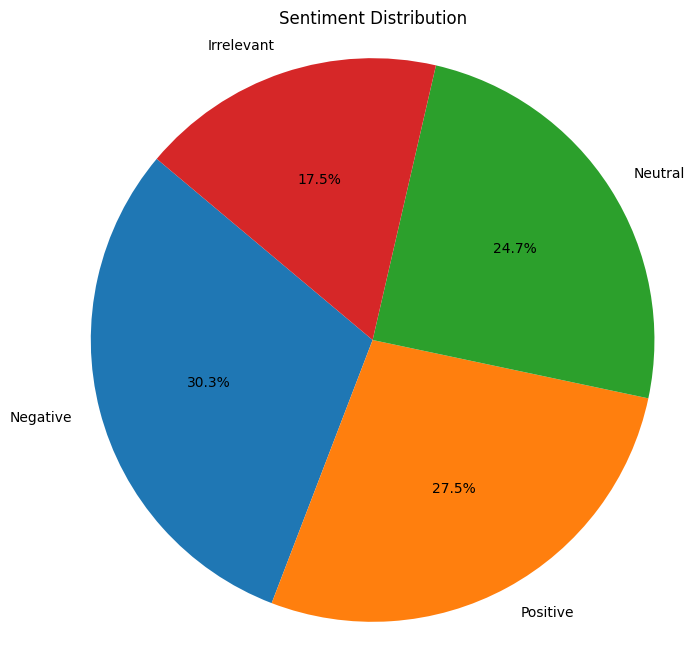

In [83]:
sentiment_counts = [21698, 19713, 17707, 12537]
sentiments = ['Negative', 'Positive', 'Neutral', 'Irrelevant']
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiments, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

TEXT CLEANING

In [84]:
import re
import nltk
import spacy
nltk.download ('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|\#', '', text)

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    return ' '.join(words)

# Apply the cleaning function to the "Tweet Content" column
df['Cleaned Tweet'] = df['Tweet_Content'].apply(clean_text)

FEATURE ENGINEERING

In [86]:
from textblob import TextBlob

# Extract hashtags
df['Hashtags'] = df['Tweet_Content'].apply(lambda x: re.findall(r'#\w+', x))

# Calculate sentiment scores using TextBlob
df['SentimentScore'] = df['Cleaned Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [87]:
# Sentiment Analysis using NLTK VADER
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['SentimentScore'] = df['Tweet_Content'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['Sentiment'] = df['SentimentScore'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


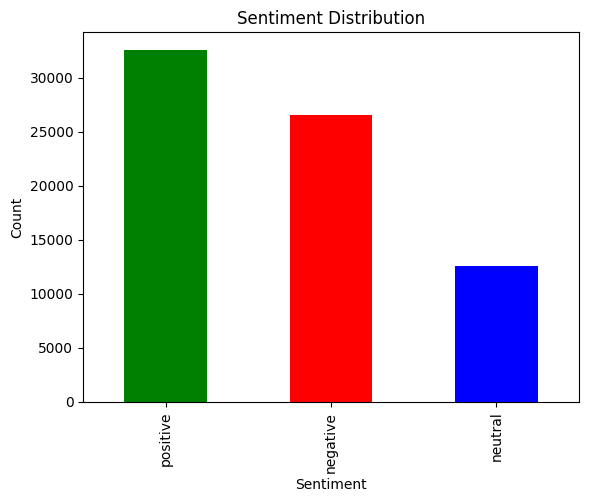

In [88]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

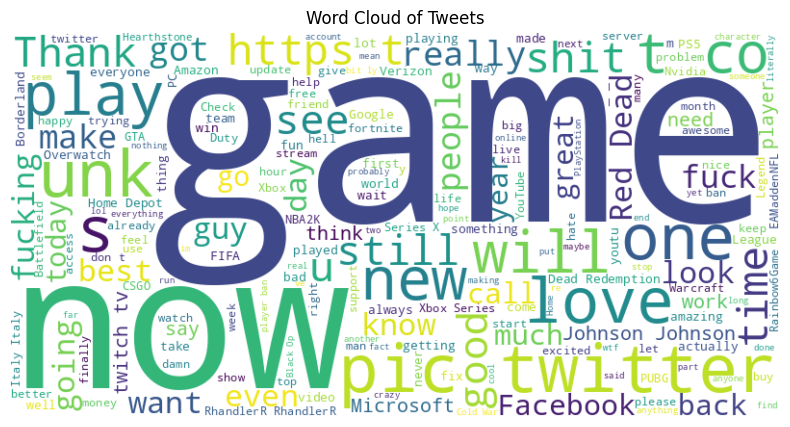

In [89]:
# Create a Word Cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Tweet_Content']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

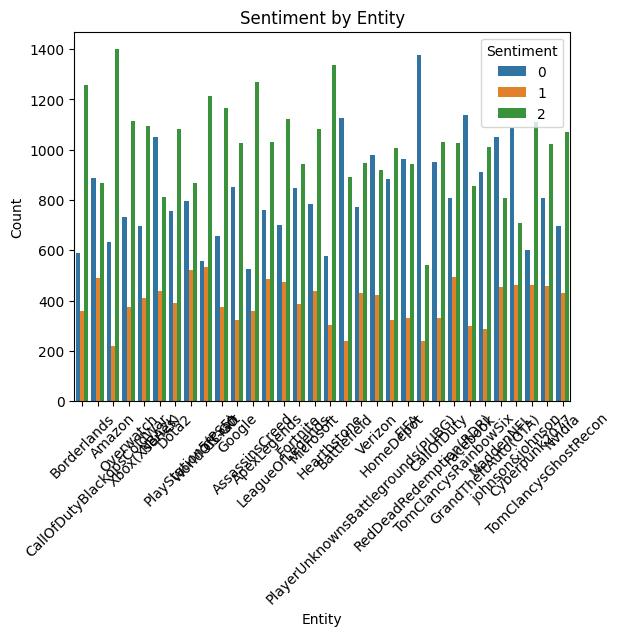

In [100]:
#Grouped bar chart of comparison of entities
sns.countplot(data=df, x='Entity', hue='Sentiment')
plt.title('Sentiment by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

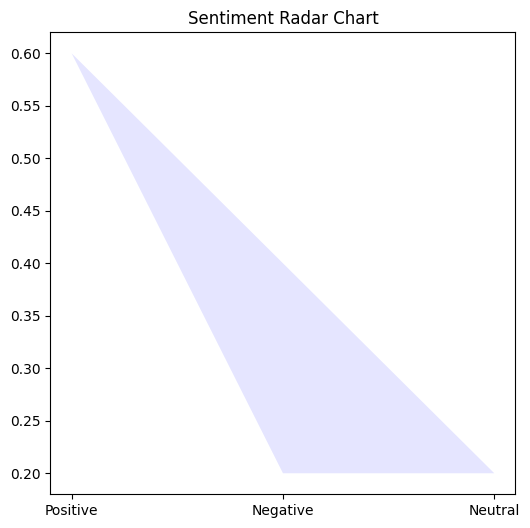

In [104]:
import numpy as np
sentiment_scores = {'Positive': 0.6, 'Negative': 0.2, 'Neutral': 0.2}

categories = list(sentiment_scores.keys())
values = list(sentiment_scores.values())

fig, ax = plt.subplots(figsize=(6, 6))

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]
ax.fill(angles, values, 'b', alpha=0.1)

# Set the labels for the radar chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Sentiment Radar Chart')
plt.show()

ENCODING TARGET COLUMN

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])

In [91]:
df.head(5)

,Tweet_ID,Entity,Sentiment,Tweet_Content,Cleaned Tweet,Hashtags,SentimentScore
0,2401,Borderlands,0,im getting on borderlands and i will murder yo...,im getting borderlands murder,[],-0.6908
1,2401,Borderlands,0,I am coming to the borders and I will kill you...,coming borders kill,[],-0.6908
2,2401,Borderlands,0,im getting on borderlands and i will kill you ...,im getting borderlands kill,[],-0.6908
3,2401,Borderlands,0,im coming on borderlands and i will murder you...,im coming borderlands murder,[],-0.6908
4,2401,Borderlands,0,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder,[],-0.6908


In [92]:
#Split the data into train & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned Tweet'], df['Sentiment'], test_size=0.2, random_state=42, stratify=df['Sentiment'])

In [93]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (57324,)
Shape of X_test:  (14331,)


MACHINE LEARNING MODEL

NAIVE BAYES MODEL

In [94]:
# Create classifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (MultinomialNB()))
])

In [95]:
# Model training
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [96]:
# Get prediction
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 2, ..., 2, 0, 2])

In [97]:
# Print score
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))

0.7566813202149187


In [98]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      5310
           1       0.96      0.19      0.31      2510
           2       0.72      0.92      0.81      6511

    accuracy                           0.76     14331
   macro avg       0.82      0.64      0.64     14331
weighted avg       0.79      0.76      0.72     14331

